<div class="alert alert-success">

## Instructions to students

If the assignment was fetched from the assignments tab, do not change the name of the assignment file(s).

### Code answers

In questions that require you to write code, there will be a code cell containing: 
    
<code># YOUR CODE HERE</code>
<br>
<code>raise NotImplementedError()</code>
    
When you are ready to write your answer, delete <code>raise NotImplementedError()</code> and write your code.

### Submitting your work
    
You should save your work before you submit ("Save" icon in top menu).
    
Before you submit, ensure that the notebook can be run from start to finish by pressing the "Restart & Run All" option in the "Kernel" menu above.
    
Once you are ready, go to the assignments tab on the Noteable landing page and click "Submit" on the relevant assignment.

</div>

**Question 5**: The Maxwell (or Maxwell-Boltzmann) distribution gives the distribution of speeds of molecules in thermal equilibrium as given by statistical mechanics. The distribution function is given as $$p(v)=\sqrt{\frac{2}{\pi}}\,\frac{v^{2}\,\exp\left(-\frac{v^{2}}{2\,a^{2}}\right)}{a^{3}}$$ with speed $v$ and $$a=\sqrt{\frac{k\,T}{m}}$$ and $k$ the Boltzmann constant, $T$ the temperature and $m$ the atomic mass of the molecules. 

Consider the SciPy function `scipy.stats.maxwell` which permits to draw random speed values from a Maxwell distribution. Given a value for the parameter $a$, the speed distribution can be used as `sample = maxwell.rvs(scale=a, size=1000)` to obtain a thousand random speeds from the Maxwell distribution with the correct temperature and molecule mass. Use the `scipy.constants` library to define the molecule mass in atomic mass units in kg and obtain the correct Boltzmann constant. Use SI units throughout.

**Task**: **(a)** Write a function `samples(T1, T2, mass)` which draws and returns two samples of 1000 random speed values each from the Maxwell distribution with temperatures $T_{1}$ and $T_{2}$ and atomic mass in units of kg as input. 

The first sample should represent Helium gas atom speeds at room temperature ($T_{1}=290\,$K), the second cold Helium at $T_{2}=4.2\,$K. Use the `scipy.constants` library to define the Helium atom mass at 4 atomic mass units in kg.

**(b)** Write a function `doCollision(ncoll, sample1, sample2)` which takes the number of simulated collisions as input as well as the two prepared samples. For each collision simulation draw a random member of both samples each and determine the mean speed value. Assign the mean speed to the individual atoms in the respective speed sample array and collide the next pair. After the collisions, concatenate the distributions into one and return the combined distribution.

Simulate 5000 collisions between the hot and cold Helium and print the final temperature value, calculated from the final mean value. The mean value of the Maxwell distribution in the notation from above is given as $$\mu=2\,a\,\sqrt{\frac{2}{\pi}}.$$ Plot the merged (concatenated) speed distribution histogram (20 bins are recommended) with appropriate axes labels and title.

Note that the energy redistribution mechanism as described in (b) is assumed to be a perfect inelastic collision and this is not a good physics model. Take it as an educational exercise rather than a serious model. The collision dynamics could easily be changed and made much more realistic. Also note that the final temperature is not the average of the initial temperatures due to the speed-to-temperature relation.

Final temperature value is 91.83372056895601 Kelvin.


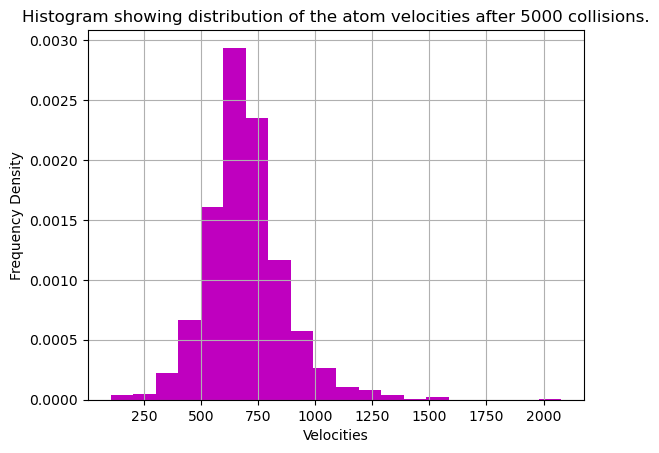

In [8]:
# YOUR CODE HERE

#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell
from scipy import constants

#samples function
def samples(T1, T2, mass):
    sample1 = maxwell.rvs(scale = a(T1,mass), size = 1000)
    sample2 = maxwell.rvs(scale = a(T2,mass), size = 1000)
    return sample1,sample2

#a function
def a(T,m):
    return ((constants.Boltzmann*T)/m)**(1/2)

#doCollisions function
def doCollision(ncoll, sample1, sample2):
    #avgspdarr = []
    for i in range(ncoll):
        j = np.random.randint(1000)
        k = np.random.randint(1000)
        avgspd = np.mean(np.array([sample1[j],sample2[k]]))
        #avgspdarr.append(avgspd)
        sample1[j],sample2[k] = avgspd,avgspd
    combdist = np.concatenate((sample1,sample2))
    #plt.plot(np.arange(ncoll),avgspdarr, 'b+')
    #plt.show()
    return combdist
        
        
    
#definitions
HeKG = 4 * constants.u
t1 = 290
t2 = 4.2
ncoll = 5000

#main code
sample1, sample2 = samples(t1,t2,HeKG)

distAfterColl = doCollision(ncoll, sample1, sample2)
finalMeanValue = np.mean(distAfterColl)

finalTemp = (np.pi*HeKG*(finalMeanValue**2))/(8*constants.Boltzmann)
print ("Final temperature value is " + str(finalTemp) + " Kelvin.")

plt.hist(distAfterColl,bins = 20, density = True, color = 'm')

plt.xlabel("Velocities")
plt.ylabel("Frequency Density")
plt.title("Histogram showing distribution of the atom velocities after " + str(ncoll) + " collisions.")
plt.grid()
plt.show()



Manual plot marking with feedback where appropriate.

In [ ]:
# Test cell, do not delete

In [ ]:
# Test cell, do not delete

In [ ]:
# Test cell, do not delete

### Tests 3 marks; Plot - 3 marks